In [7]:
using BoundaryValueDiffEq, ForwardDiff

In [8]:
using DifferentialEquations
using OrdinaryDiffEq

In [9]:
using OrdinaryDiffEq

In [11]:
using Plots

In [12]:
potential(x) = x^4/4 - x^2/2;

In [ ]:
#dev_potential(x) = 4*x^3 - 12*x - 2

In [ ]:
#sec_potential(x) = 12*x^3 - 12

In [13]:
phi_const(k) = cosh(k) - 1

phi_const (generic function with 1 method)

In [ ]:
#phi_deriv(k) = sinh(k)

In [15]:
x1 = -1.0
x2 = -0.0;

In [16]:
#function euler_lagrange!(du, u, p, t)
#    du[1] = -dev_potential(u[1]) + u[2] + phi_deriv(u[2])
#    du[2] =  sec_potential(u[1])*u[2]
#end

In [59]:
function euler_lagrange!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2] + 0.01*ForwardDiff.derivative(phi_const, u[2])
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

function euler_l!(du, u, p, t)
    du[1] = -ForwardDiff.derivative(potential, u[1]) + u[2]
    du[2] = ForwardDiff.derivative(x -> ForwardDiff.derivative(potential, x), u[1])*u[2]
end

euler_l! (generic function with 1 method)

In [52]:
function bc2!(residual, u, p, t) # u[1] is the beginning of the time span, and u[end] is the ending
    residual[1] = u[1][1] - x1 # the solution at the beginning of the time span should be -pi/2
    residual[2] = u[end][1] - x2 # the solution at the end of the time span should be pi/2
end

bc2! (generic function with 1 method)

In [53]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [54]:
u0 = [x1, 0.0] # the initial guess

2-element Vector{Float64}:
 -1.0
  0.0

In [60]:
bvp3 = BVProblem(euler_lagrange!, bc2!, u0, tspan)
bvp4 = BVProblem(euler_l!, bc2!, u0, tspan)


BVProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 -1.0
  0.0

In [61]:
sol3 = solve(bvp3, Shooting(Vern7()))
sol4 = solve(bvp4, Shooting(Vern7()))

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:536
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.353816215750175. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529


┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.353816293498154. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.357255472553245. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.356501991410518. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.356316299255221. Aborting. There is either an error in your model specifi

┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=6.356153924383339. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/vetkje/.julia/packages/SciMLBase/DLiTf/src/integrator_interface.jl:529


retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 9-element Vector{Float64}:
  0.0
  0.4185693064424372
  1.266475304677243
  2.3241400049602152
  3.6300154311735393
  5.313730136838636
  7.471680888985343
  9.329753362414946
 10.0
u: 9-element Vector{Vector{Float64}}:
 [-0.9984426323319292, 1.8832166838725935e-12]
 [-0.9993248474154671, 4.338247061538824e-12]
 [-0.999876070892491, 2.3608937092535884e-11]
 [-0.9999851062535509, 1.9570194720607395e-10]
 [-0.9999989597080688, 2.6652589550833e-9]
 [-0.9999999909974598, 7.715336302376943e-8]
 [-0.9999985668459842, 5.7125773364933375e-6]
 [-0.9999415349997457, 0.00023384074107570256]
 [-0.9997766635305995, 0.0008930469095814132]

In [57]:
#plot(sol2.t, map(x-> x[1], sol2.u))

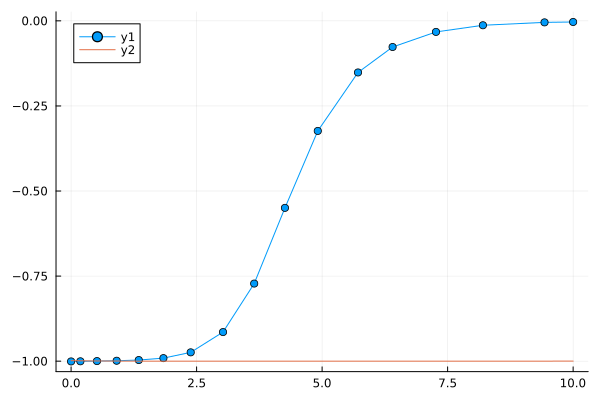

In [69]:
plot(sol3.t, map(x-> x[1], sol3.u), marker = :circle)
plot!(sol4.t, map(x-> x[1], sol4.u))

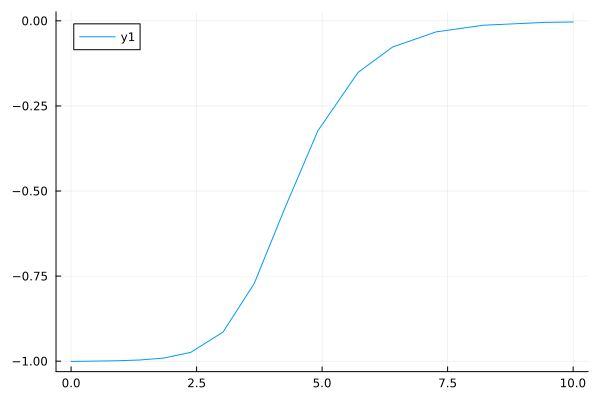

In [70]:
#plot(sol2.t, map(x-> x[1], sol2.u))
plot(sol3.t, map(x-> x[1], sol3.u))